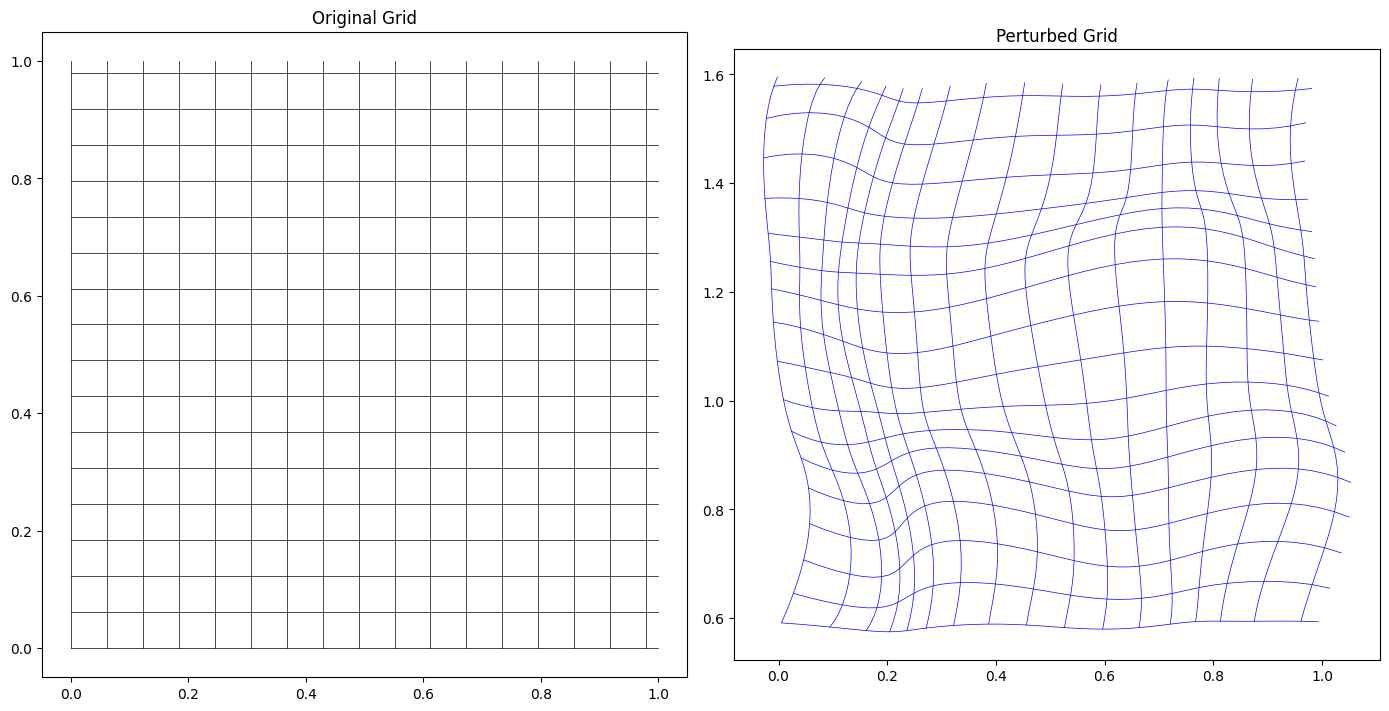

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.fft import fft2, ifft2

# Step 1: Create the Cartesian grid
Nx, Ny = 50, 50
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y, indexing='ij')

# Step 2: Generate random metric perturbations
epsilon = 5  # Smallness parameter
np.random.seed(0)

# Random fields for h_xx, h_yy, h_xy
h_xx = epsilon * gaussian_filter(np.random.randn(Nx, Ny), sigma=4)
h_yy = epsilon * gaussian_filter(np.random.randn(Nx, Ny), sigma=4)
h_xy = epsilon * gaussian_filter(np.random.randn(Nx, Ny), sigma=5)

# Step 3: Solve for displacement field u
# We approximate:
# ∇²u^i ≈ divergence of h

# Build Fourier frequencies
kx = np.fft.fftfreq(Nx, d=x[1]-x[0]) * 2*np.pi
ky = np.fft.fftfreq(Ny, d=y[1]-y[0]) * 2*np.pi
KX, KY = np.meshgrid(kx, ky, indexing='ij')

# Laplacian in Fourier space
Laplacian = -(KX**2 + KY**2)
Laplacian[0, 0] = 1.0  # avoid division by zero at k=0

# Compute divergence of h
div_hx = np.gradient(h_xx, x, axis=0) + np.gradient(h_xy, y, axis=1)
div_hy = np.gradient(h_xy, x, axis=0) + np.gradient(h_yy, y, axis=1)

# Fourier transform of divergence
div_hx_hat = fft2(div_hx)
div_hy_hat = fft2(div_hy)

# Solve Poisson equation in Fourier space
u_x_hat = div_hx_hat / Laplacian
u_y_hat = div_hy_hat / Laplacian

# Transform back to real space
u_x = np.real(ifft2(u_x_hat))
u_y = np.real(ifft2(u_y_hat))

# Step 4: Update grid points
X_new = X + u_x
Y_new = Y + u_y

# Step 5: Plot the results
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Original grid
axs[0].set_title('Original Grid')
for i in range(0, Nx, 3):
    axs[0].plot(X[i, :], Y[i, :], 'k-', lw=0.5)
for j in range(0, Ny, 3):
    axs[0].plot(X[:, j], Y[:, j], 'k-', lw=0.5)
axs[0].set_aspect('equal')

# Deformed grid
axs[1].set_title('Perturbed Grid')
for i in range(0, Nx, 3):
    axs[1].plot(X_new[i, :], Y_new[i, :], 'b-', lw=0.5)
for j in range(0, Ny, 3):
    axs[1].plot(X_new[:, j], Y_new[:, j], 'b-', lw=0.5)
axs[1].set_aspect('equal')

plt.tight_layout()
plt.show()


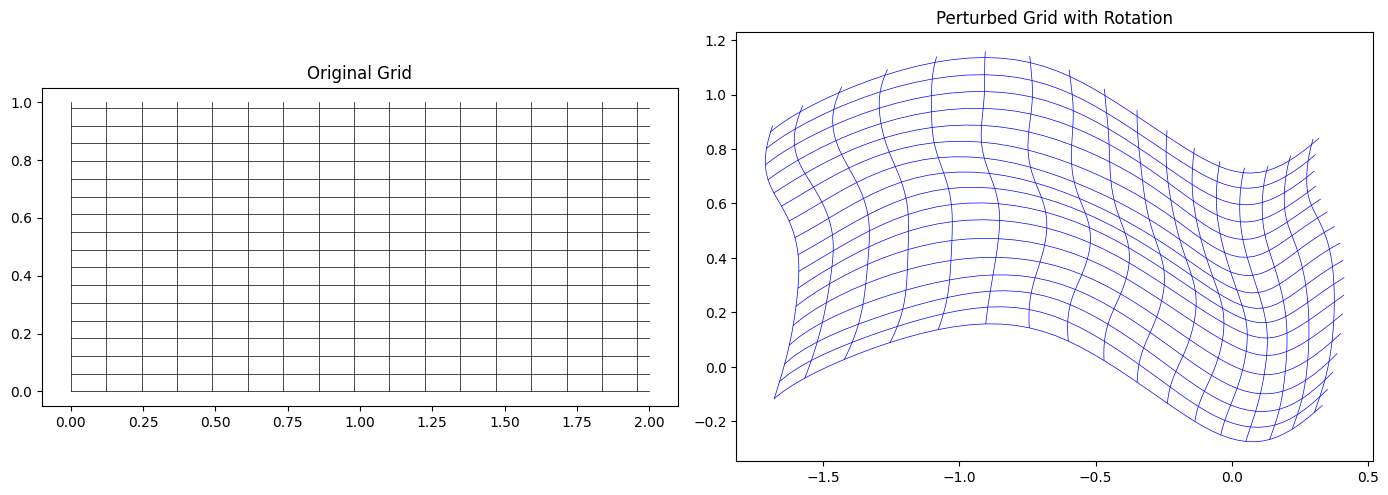

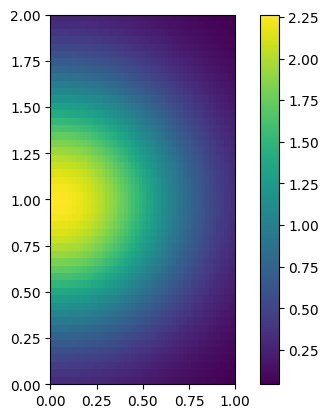

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.fft import fft2, ifft2

# Step 1: Grid
Nx, Ny = 50, 50
x = np.linspace(0, 2, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y, indexing='ij')

# Step 2: Generate symmetric (strain) and antisymmetric (rotation) fields
epsilon_strain = 4.01
epsilon_rotation = 3


# Symmetric part (strain)
h_xx = epsilon_strain * gaussian_filter(np.random.randn(Nx, Ny), sigma=5) 
h_yy = epsilon_strain * gaussian_filter(np.random.randn(Nx, Ny), sigma=5)
h_xy = epsilon_strain * gaussian_filter(np.random.randn(Nx, Ny), sigma=5)

# Antisymmetric part (rotation field)
rotation_field = epsilon_rotation * gaussian_filter(np.random.randn(Nx, Ny), sigma=8)
rotation_field = epsilon_rotation * np.random.randn() * np.exp(-((X-np.random.rand()*x.max())**2 + (Y-np.random.rand()*y.max())**2)/0.5)
# Step 3: Build divergence terms
# divergence of symmetric part
div_hx = np.gradient(h_xx, x, axis=0) + np.gradient(h_xy, y, axis=1)
div_hy = np.gradient(h_xy, x, axis=0) + np.gradient(h_yy, y, axis=1)

# add rotational part
div_hx += np.gradient(rotation_field, y, axis=1)  # partial_y of rotation field
div_hy += -np.gradient(rotation_field, x, axis=0) # -partial_x of rotation field

# Step 4: Fourier solve
kx = np.fft.fftfreq(Nx, d=x[1]-x[0]) * 2*np.pi
ky = np.fft.fftfreq(Ny, d=y[1]-y[0]) * 2*np.pi
KX, KY = np.meshgrid(kx, ky, indexing='ij')
Laplacian = -(KX**2 + KY**2)
Laplacian[0, 0] = 1.0  # avoid division by zero

div_hx_hat = fft2(div_hx)
div_hy_hat = fft2(div_hy)

u_x_hat = div_hx_hat / Laplacian
u_y_hat = div_hy_hat / Laplacian

u_x = np.real(ifft2(u_x_hat))
u_y = np.real(ifft2(u_y_hat))

# Step 5: New grid
X_new = X + u_x
Y_new = Y + u_y

# Step 6: Visualize
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Original grid
axs[0].set_title('Original Grid')
for i in range(0, Nx, 3):
    axs[0].plot(X[i, :], Y[i, :], 'k-', lw=0.5)
for j in range(0, Ny, 3):
    axs[0].plot(X[:, j], Y[:, j], 'k-', lw=0.5)
axs[0].set_aspect('equal')

# Deformed grid
axs[1].set_title('Perturbed Grid with Rotation')
for i in range(0, Nx, 3):
    axs[1].plot(X_new[i, :], Y_new[i, :], 'b-', lw=0.5)
for j in range(0, Ny, 3):
    axs[1].plot(X_new[:, j], Y_new[:, j], 'b-', lw=0.5)
axs[1].set_aspect('equal')

plt.tight_layout()
plt.show()

plt.figure()
plt.imshow(rotation_field, cmap='viridis', extent=(0, 1, 0, 2))
plt.colorbar()